<a href="https://colab.research.google.com/github/saraswatp/Name_pks/blob/main/image%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
index =0
X_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

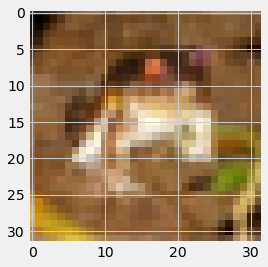

In [4]:
# displaying of image
img=plt.imshow(X_train[index])

In [5]:
# Display the image label
print("The image label is:", y_train [index])

The image label is: [6]


In [6]:
classification=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]
# image class printing
print("The image class is:", classification[y_train[index][0]])
#conversion of labels into set of 10 numbers to input to neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)
print(y_train_one_hot)
#printing of new labels
print("The new label is:", y_train_one_hot[index])
#Normalization of pixels values between zero and one
X_train=X_train/255
X_test=X_test/255
X_train[index]


The image class is: frog
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
The new label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [7]:
model=Sequential()
model.add(Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)))
#Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Add another convolution layer
model.add(Conv2D(32, (5,5), activation="relu"))
#Add another pooling layer in this
model.add(MaxPooling2D(pool_size=(2,2)))
#Add a flattening layer
model.add(Flatten())
#Add a layer with 1000 neurons
model.add(Dense(1000, activation="relu"))
#Add a dropout layer
model.add(Dropout(0.5))
#Add a layer with 500 neurons
model.add(Dense(500, activation="relu"))
#Add a dropout layer
model.add(Dropout(0.5))
#Add a layer with 250 neurons
model.add(Dense(250, activation="relu"))
#Add a layer with 10 neurons
model.add(Dense(10, activation="softmax"))

In [8]:
#compilation of the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
# Train the model
hist=model.fit(X_train, y_train_one_hot, batch_size = 256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 61s 380ms/step - loss: 1.7492 - accuracy: 0.3431 - val_loss: 1.5106 - val_accuracy: 0.4471
Epoch 2/10
157/157 [==============================] - 57s 365ms/step - loss: 1.3896 - accuracy: 0.4930 - val_loss: 1.2969 - val_accuracy: 0.5332
Epoch 3/10
157/157 [==============================] - 56s 359ms/step - loss: 1.2403 - accuracy: 0.5517 - val_loss: 1.1949 - val_accuracy: 0.5793
Epoch 4/10
157/157 [==============================] - 56s 358ms/step - loss: 1.1452 - accuracy: 0.5917 - val_loss: 1.0807 - val_accuracy: 0.6192
Epoch 5/10
157/157 [==============================] - 57s 365ms/step - loss: 1.0633 - accuracy: 0.6227 - val_loss: 1.1400 - val_accuracy: 0.6060
Epoch 6/10
157/157 [==============================] - 56s 355ms/step - loss: 1.0018 - accuracy: 0.6455 - val_loss: 1.0212 - val_accuracy: 0.6374
Epoch 7/10
157/157 [==============================] - 56s 357ms/step - loss: 0.9374 - accuracy: 0.6661 - val_loss: 1.0102 - val_ac

In [10]:
model.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 17ms/step - loss: 0.9276 - accuracy: 0.6787


0.6786999702453613

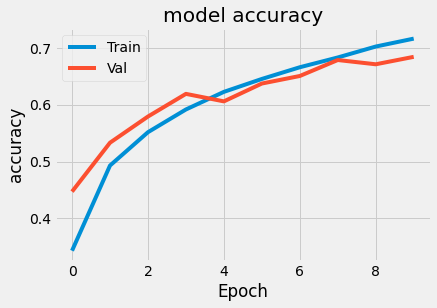

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

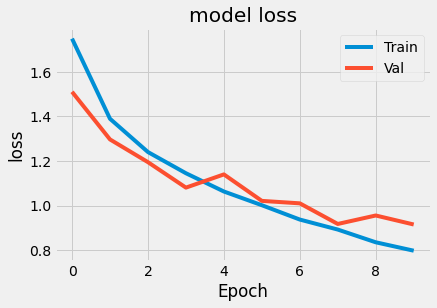

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()

In [13]:
# Test the model with example
from google.colab import files
uploaded=files.upload()

Saving cat1.jpg to cat1.jpg


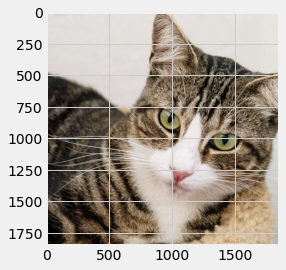

In [16]:
new_image=plt.imread('cat1.jpg')
img=plt.imshow(new_image)

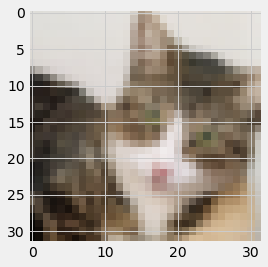

In [17]:
from skimage.transform import resize
resized_image=resize(new_image, (32,32,3))
img=plt.imshow(resized_image)

In [19]:
predictions=model.predict(np.array([resized_image]))
predictions

array([[0.00622719, 0.00346993, 0.01960132, 0.5905283 , 0.03146749,
        0.24482259, 0.07034919, 0.00785399, 0.01398559, 0.01169436]],
      dtype=float32)

In [22]:
# short the predictions
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp

print(list_index)


[3, 5, 6, 4, 2, 8, 9, 7, 0, 1]


In [24]:
#print predictions
for i in range(10):
  print(classification[list_index[i]], ":", predictions[0][list_index[i]]*100, "%")

cat : 59.052830934524536 %
dog : 24.482259154319763 %
frog : 7.034918665885925 %
deer : 3.1467489898204803 %
bird : 1.960131712257862 %
ship : 1.3985591009259224 %
truck : 1.1694355867803097 %
horse : 0.785399042069912 %
airplane : 0.6227188743650913 %
automobile : 0.34699314273893833 %
